# Classificação Dataset Iris

## Importação dos Dados

In [ ]:
import pandas as pd
from sklearn import datasets
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

data_iris = datasets.load_iris()

df_iris = sklearn_to_df(data_iris)

df_iris["target_name"] = None
df_iris.iloc[df_iris.loc[df_iris["target"] == 0].index, 5] = "setosa"
df_iris.iloc[df_iris.loc[df_iris["target"] == 1].index, 5] = "versicolor"
df_iris.iloc[df_iris.loc[df_iris["target"] == 2].index, 5] = "virginica"

target_names = data_iris.target_names

## Análise Exploratória

In [ ]:
df_iris.isna().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target               False
target_name          False
dtype: bool

In [ ]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


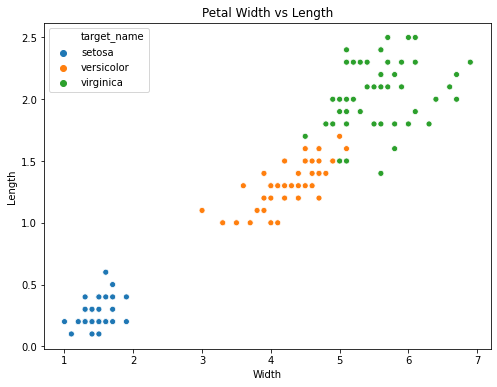

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_iris, x = "petal length (cm)", y = "petal width (cm)", hue = "target_name")
plt.title("Petal Width vs Length")
plt.xlabel("Width")
plt.ylabel("Length")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


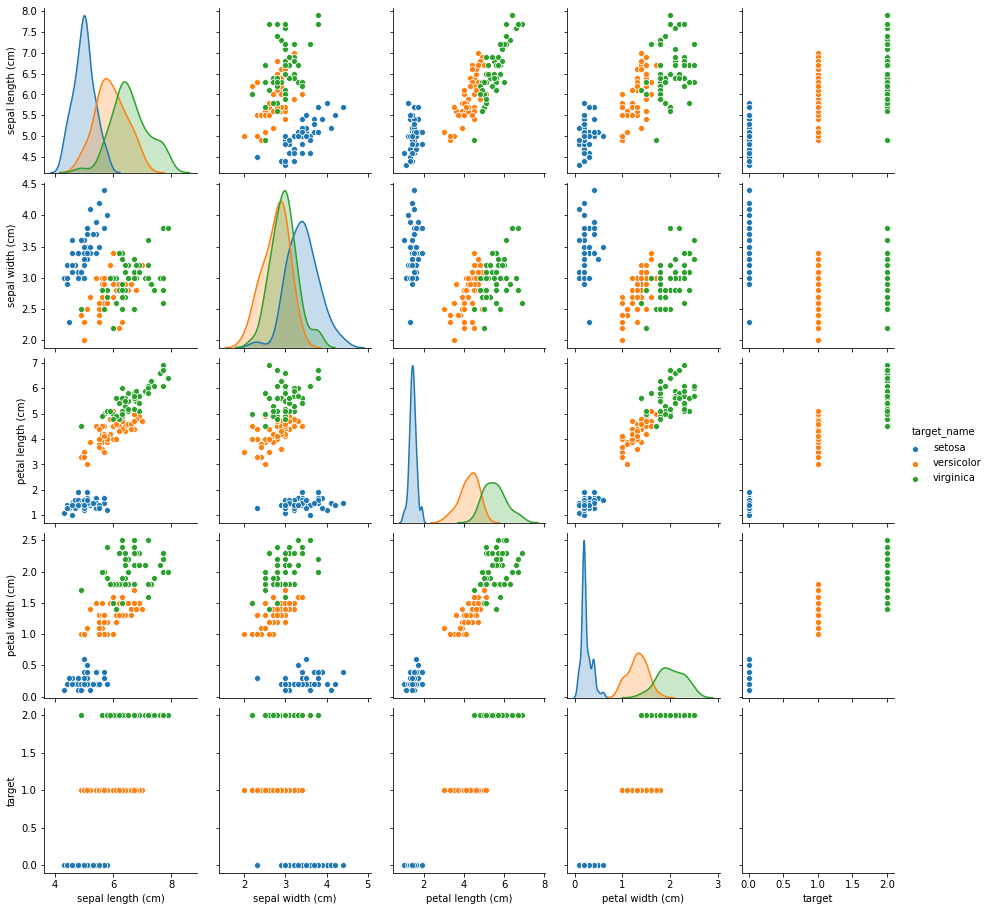

In [ ]:
sns.pairplot(df_iris, hue = "target_name")

## Criação e Treinamento do Modelo

#### Divisão dos dados

In [ ]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(data_iris.data, data_iris.target, test_size=0.80)
print(f"Treino: {len(x_treino)}")
print(f"Teste: {len(x_teste)}")

Treino: 30
Teste: 120


### Criação e Treinamento

In [ ]:
from sklearn import tree
# https://scikit-learn.org/stable/modules/tree.html#classification

modelo = tree.DecisionTreeClassifier()
modelo = modelo.fit(x_treino, y_treino)

### Visualização do Modelo

[Text(558.0, 503.3333333333333, 'X[2] <= 4.8\ngini = 0.664\nsamples = 30\nvalue = [10, 9, 11]'),
 Text(372.0, 302.0, 'X[3] <= 0.8\ngini = 0.499\nsamples = 19\nvalue = [10, 9, 0]'),
 Text(186.0, 100.66666666666663, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0]'),
 Text(558.0, 100.66666666666663, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(744.0, 302.0, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11]')]

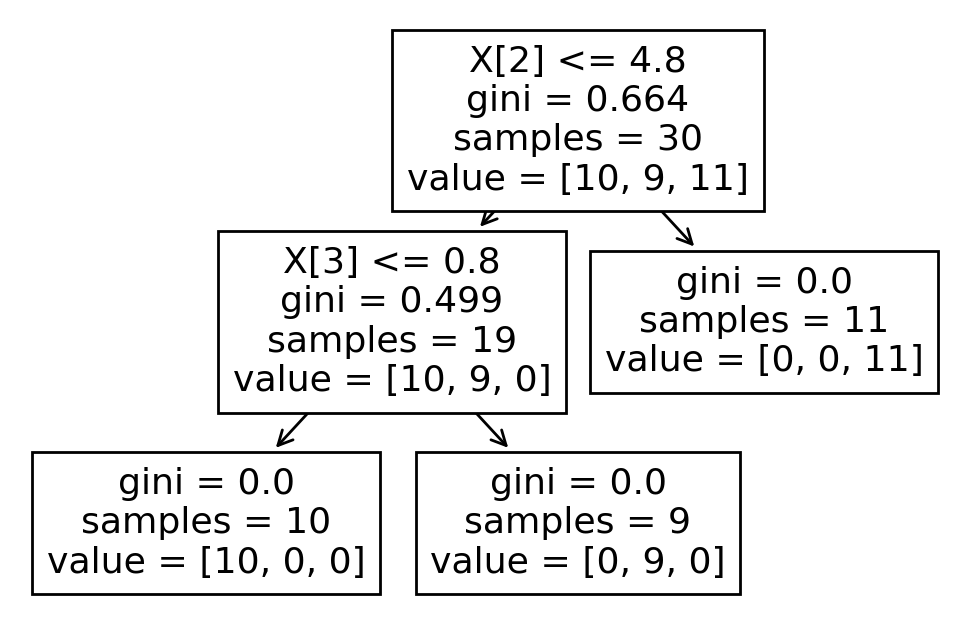

In [ ]:
plt.rcParams['figure.dpi'] = 200
tree.plot_tree(modelo)

### Predição dados de treino

In [ ]:
y_predicao = modelo.predict(x_teste)
print(x_teste)
print(y_predicao)
print(target_names)

[[5.  3.4 1.5 0.2]
 [4.9 3.  1.4 0.2]
 [6.2 2.2 4.5 1.5]
 [5.5 2.3 4.  1.3]
 [6.7 3.1 4.7 1.5]
 [4.9 3.6 1.4 0.1]
 [5.1 3.8 1.9 0.4]
 [6.  3.  4.8 1.8]
 [7.3 2.9 6.3 1.8]
 [6.1 2.9 4.7 1.4]
 [6.3 2.5 5.  1.9]
 [5.2 3.5 1.5 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.4 1.9 0.2]
 [7.2 3.2 6.  1.8]
 [6.5 3.  5.5 1.8]
 [4.6 3.1 1.5 0.2]
 [5.4 3.4 1.7 0.2]
 [5.7 3.  4.2 1.2]
 [5.  3.4 1.6 0.4]
 [6.7 3.3 5.7 2.5]
 [5.8 2.7 5.1 1.9]
 [6.1 2.8 4.7 1.2]
 [5.4 3.  4.5 1.5]
 [4.9 2.4 3.3 1. ]
 [4.9 2.5 4.5 1.7]
 [6.1 3.  4.6 1.4]
 [5.6 2.8 4.9 2. ]
 [6.8 3.  5.5 2.1]
 [6.3 2.5 4.9 1.5]
 [6.3 2.7 4.9 1.8]
 [6.3 2.8 5.1 1.5]
 [5.  3.5 1.3 0.3]
 [5.9 3.  4.2 1.5]
 [5.7 2.5 5.  2. ]
 [7.6 3.  6.6 2.1]
 [5.5 2.4 3.8 1.1]
 [5.6 2.9 3.6 1.3]
 [6.9 3.1 4.9 1.5]
 [5.1 3.4 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [6.4 2.9 4.3 1.3]
 [5.  3.6 1.4 0.2]
 [7.2 3.  5.8 1.6]
 [5.1 3.8 1.5 0.3]
 [5.8 2.6 4.  1.2]
 [4.8 3.  1.4 0.3]
 [5.5 3.5 1.3 0.2]
 [6.2 2.8 4.8 1.8]
 [4.7 3.2 1.3 0.2]
 [5.3 3.7 1.5 0.2]
 [6.8 2.8 4.8 1.4]
 [6.7 3.  5.

### Avaliação do Modelo

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_teste, y_predicao, target_names = target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.85      0.91        41
   virginica       0.86      0.97      0.92        39

    accuracy                           0.94       120
   macro avg       0.95      0.94      0.94       120
weighted avg       0.95      0.94      0.94       120

